In [ ]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

from importlib import reload

In [3]:
import datajoint_utils as du

INFO - 2021-01-13 15:34:53,648 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 15:34:53,649 - settings - Setting database.user to celiib
INFO - 2021-01-13 15:34:53,650 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 15:34:53,667 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-13 15:34:53,668 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-13 15:34:53,681 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-13 15:34:53,939 - settings - Setting enable_python_native_blobs to True


In [4]:
test_mode = True

In [5]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-13 15:34:54,024 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 15:34:54,025 - settings - Setting database.user to celiib
INFO - 2021-01-13 15:34:54,026 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 15:34:54,030 - settings - Setting enable_python_native_blobs to True


Sleeping 124 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-13 15:34:54,311 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [6]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [7]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 2966


In [8]:
#so that it will have the adapter defined
from datajoint_utils import *

In [9]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,110.528,545.626,544.758,2022,0.00019955997643994288,7.352727272727273,5469042.445,122,0.0003697173719777192,16.574,270764755455.50858,71119038.51464462,26722.95164167566,49508.62206290823,2219383241.438595,3221.0944
864691135065024068,0,0.25,29.00,0,0,1,=BLOB=,1683573,3378174,0,2,2,0,1,11,341,101,15436156.56531248,4728701.448726788,29394.698,311.757,282.738,609.362,594.189,4971,0.00032203612207268187,14.577712609970675,12419519.814,240,0.00040025702075827455,20.712,539357389298.1111,63617255.66268921,34941.17120515178,43428.199912376345,2247322455.4087963,6815.4656
864691135065033540,0,0.25,29.00,0,0,1,=BLOB=,788810,1618020,0,2,2,1,2,7,202,142,7316260.375838028,4091724.4008084666,21512.089,103.41,103.41,416.992,381.352,2199,0.0003005633871727972,10.886138613861386,3494175.925,84,0.0006293329377798859,26.179,450362108267.2257,122117801.5433146,61556.3259277305,128889.36273786092,5361453669.847925,1706.8981
864691135210051520,0,0.25,29.00,0,0,1,=BLOB=,498916,1023655,0,1,1,0,1,13,162,65,6094179.568630371,2578115.586153359,19166.911,95.1

In [10]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [11]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,26948,35067,2021-01-13 03:34:10


INFO - 2021-01-13 15:34:54,449 - autopopulate - Found 55 keys to populate
INFO - 2021-01-13 15:34:54,457 - connection - Transaction started
INFO - 2021-01-13 15:34:54,459 - autopopulate - Populating: {'segment_id': 864691135462292893, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135462292893-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = []


 -------- Working on limb 0------------
Starting combinations to process = [[ 3 53]
 [ 3 82]
 [53 82]]


---- working on disconnecting 3 and 53
---- This disconnects S0_0 from S2_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [3, 4, 6, 7, 8, 10, 17, 22, 30, 35, 39, 48, 51, 50, 47, 46, 53]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0  2  4  5  6  7  8  9 10 11 16 17 20 22 25 30 31 33 34 35 38 39 41 42
 44 45 46 47 48 49 50 51 52]
Short segments to combine = []
Found 2 high degree coordinates to cut
Picking [742528. 359011. 920545.] high degree coordinates to cut
curr_limb.deleted_edges 4=[

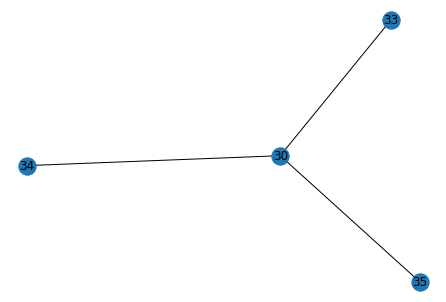

match_branches = [[30, 33]]
edges_to_delete (resolve crossover) = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create (resolve crossover) = [[30, 33]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create = [[30, 33]]
Number of connected components = 3
Comp 0 = {26, 27, 28, 29, 31, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32, 33, 36}
Comp 2 = {34}
curr_limb_copy.deleted_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
curr_limb_copy.created_edges = [[30, 33]]
After get best cut: cut_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]], added_edges = [[30, 

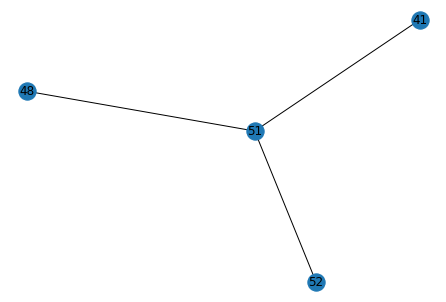

match_branches = [[48, 51], [41, 52]]
edges_to_delete (resolve crossover) = [[41, 48], [41, 51], [48, 52], [51, 52]]
edges_to_create (resolve crossover) = [[48, 51], [41, 52]]
curr_limb.deleted_edges 5 =[[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 48], [41, 51], [48, 52], [51, 52]]
edges_to_create = [[48, 51], [41, 52]]
Number of connected components = 5
Comp 0 = {26, 27, 28, 29, 31, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {41, 52}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32, 33, 36}
Comp 3 = {34}
Comp 4 = {73}
curr_limb_copy.deleted_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35], [41, 48], [41, 51], [48, 52], [51, 52]]
curr_limb_copy.created_edges

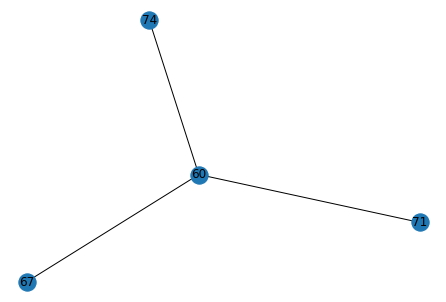

match_branches = []
edges_to_delete (resolve crossover) = [[60, 67], [60, 71], [60, 74], [67, 71], [67, 74], [71, 74]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[30, 34], [30, 35], [33, 34], [33, 35], [34, 35], [41, 48], [41, 51], [48, 52], [51, 52]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[60, 67], [60, 71], [60, 74], [67, 71], [67, 74], [71, 74]]
edges_to_create = []
Number of connected components = 8
Comp 0 = {96, 68, 74, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95}
Comp 1 = {26, 27, 28, 29, 31, 35, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 57, 58, 60, 61}
Comp 2 = {64, 65, 67}
Comp 3 = {66, 69, 70, 71, 72, 40, 91, 75, 76, 77, 56, 59, 92, 62, 63}
Comp 4 = {41, 52}
Comp 5 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32, 33, 36}
Comp 6 = {34}
Comp 7 = {73}
curr_limb_copy.deleted_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35], [41, 48], [4

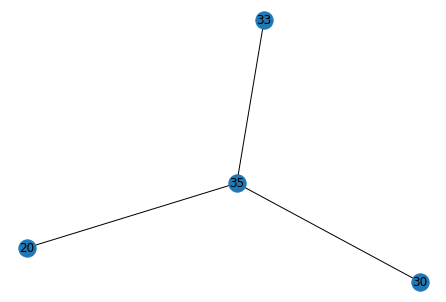

match_branches = []
edges_to_delete (resolve crossover) = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {34}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
To

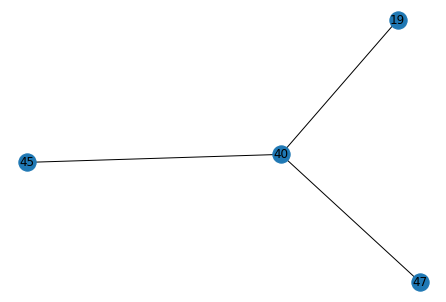

match_branches = [[40, 45], [19, 47]]
edges_to_delete (resolve crossover) = [[19, 40], [19, 45], [40, 47], [45, 47]]
edges_to_create (resolve crossover) = [[40, 45], [19, 47]]
curr_limb.deleted_edges 5 =[[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 40], [19, 45], [40, 47], [45, 47]]
edges_to_create = [[40, 45], [19, 47]]
Number of connected components = 7
Comp 0 = {11, 12, 13, 14, 15, 16, 17, 21, 23, 24, 25, 26, 28, 29, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 5 = {34}
Comp 6 = {69}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47]]
curr_limb_copy.created_edges = [[40, 45], [19, 47]]
After get best cut: cut_edges = [[19, 40], [

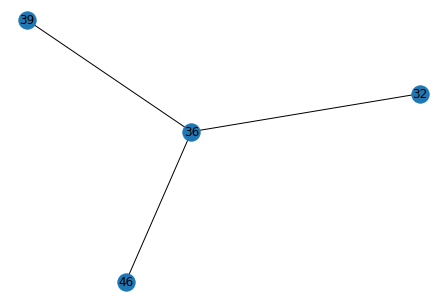

match_branches = [[32, 39], [36, 46]]
edges_to_delete (resolve crossover) = [[32, 36], [32, 46], [36, 39], [39, 46]]
edges_to_create (resolve crossover) = [[32, 39], [36, 46]]
curr_limb.deleted_edges 5 =[[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[32, 36], [32, 46], [36, 39], [39, 46]]
edges_to_create = [[32, 39], [36, 46]]
Number of connected components = 8
Comp 0 = {11, 12, 13, 14, 24, 25, 26, 29, 31, 35, 36, 37, 38, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {32, 64, 39, 40, 41, 42, 43, 44, 45, 15, 48, 17, 16, 23, 21, 54, 55, 28, 63}
Comp 5 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 6 = {34}
Comp 7 = {69}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47], [32, 36], [32, 46], [36, 39], [39, 46]]
curr_l

  Edge: [29 24]: curr_angle = 28.98
  Edge: [24 25]: curr_angle = 92.32
  Edge: [25 26]: curr_angle = 70.14
  Edge: [26 53]: curr_angle = 38.08
  Edge: [53 57]: curr_angle = 22.21
  Edge: [57 59]: curr_angle = 33.1
  Edge: [59 61]: curr_angle = 18.87

Total time for doubling_back = 0.3335683345794678

Attempting the width jump check (attempting from both sides)
  Edge: [29 24]: jump = -53.99
  Edge: [24 25]: jump = -209.93
  Edge: [25 26]: jump = 166.25
  Edge: [26 53]: jump = 220.41
Adding error edge [26 53] because width jump was 220.4108954056142
  Edge: [53 57]: jump = -5.53
  Edge: [57 59]: jump = 82.33
  Edge: [59 61]: jump = 291.45
Adding error edge [59 61] because width jump was 291.44947347312973
Total time for width = 0.31413912773132324
Path starting at 29 had err_edges: [[26, 53], [59, 61]]
  Edge: [61 59]: jump = -482.6
  Edge: [59 57]: jump = -44.67
  Edge: [57 53]: jump = -32.28
  Edge: [53 26]: jump = -220.41
  Edge: [26 25]: jump = -198.89
  Edge: [25 24]: jump = 209.9

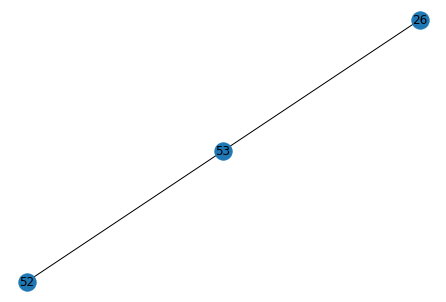

match_branches = [[52, 53]]
edges_to_delete (resolve crossover) = [[26, 52], [26, 53]]
edges_to_create (resolve crossover) = [[52, 53]]
edges_to_delete (cut_limb_network) = [array([26, 52]), array([26, 53])]
edges_to_create = [[52, 53]]
Number of connected components = 9
Comp 0 = {13, 31, 35, 36, 37, 38, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68}
Comp 1 = {11, 12, 14, 24, 25, 26, 29}
Comp 2 = {20}
Comp 3 = {27, 30, 22}
Comp 4 = {33}
Comp 5 = {32, 64, 39, 40, 41, 42, 43, 44, 45, 15, 48, 17, 16, 23, 21, 54, 55, 28, 63}
Comp 6 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 7 = {34}
Comp 8 = {69}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 40], [19, 45], [40, 47], [45, 47], [32, 36], [32, 46], [36, 39], [39, 46], array([26, 52]), array([26, 53])]
curr_limb_copy.created_edges = [[40, 45], [19, 47], [32, 39], [36, 46], [52, 53]]
After get best cut: cut_edges = [array([26, 52]), array([26, 53])], added_edges 

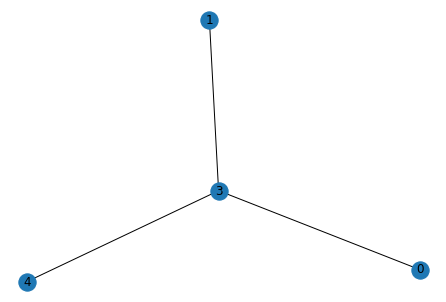

match_branches = [[0, 4], [1, 3]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 3], [1, 4], [3, 4]]
edges_to_create (resolve crossover) = [[0, 4], [1, 3]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 3], [1, 4], [3, 4]]
edges_to_create = [[0, 4], [1, 3]]
Number of connected components = 2
Comp 0 = {1, 3}
Comp 1 = {0, 2, 4, 5, 6, 7, 8, 9, 10}
curr_limb_copy.deleted_edges = [[0, 1], [0, 3], [1, 4], [3, 4]]
curr_limb_copy.created_edges = [[0, 4], [1, 3]]
After get best cut: cut_edges = [[0, 1], [0, 3], [1, 4], [3, 4]], added_edges = [[0, 4], [1, 3]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([1, 3]), array([ 0,  2,  4,  5,  6,  7,  8,  9, 10])]


 ------

  Edge: [2 5]: curr_angle = 42.77
  Edge: [ 5 10]: curr_angle = 15.26

Total time for doubling_back = 0.28592491149902344

Attempting the width jump check (attempting from both sides)
  Edge: [2 5]: jump = -155.07
  Edge: [ 5 10]: jump = -49.22
Total time for width = 0.25301146507263184
Path starting at 1 had err_edges: []
  Edge: [10  5]: jump = 49.22
  Edge: [5 2]: jump = 155.07
Total time for width = 0.25144243240356445
Path starting at 10 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]


 ------ Total time for Splitting 864691135593565995 = 288.4804584980011 ------


----- Wor

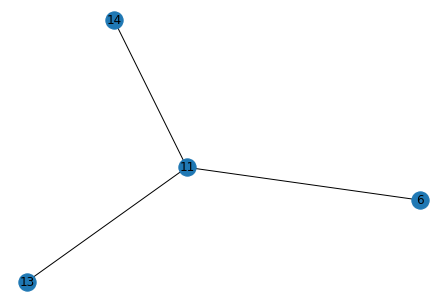

match_branches = [[11, 14], [6, 13]]
edges_to_delete (resolve crossover) = [[6, 11], [6, 14], [11, 13], [13, 14]]
edges_to_create (resolve crossover) = [[11, 14], [6, 13]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 11], [6, 14], [11, 13], [13, 14]]
edges_to_create = [[11, 14], [6, 13]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27.0, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
Comp 1 = {10, 11, 14, 7}
Comp 2 = {12}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [11, 13], [13, 14]]
curr_limb_copy.created_edges = [[11, 14], [6, 13]]
After get best cut: cut_edges = [[6, 11], [6, 14], [11, 13], [13, 14]], added_edges = [[11, 14], [6, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end

  Edge: [41 37]: curr_angle = 40.51
  Edge: [37 28]: curr_angle = 28.21
  Edge: [28 26]: curr_angle = 18.36
  Edge: [26 35]: curr_angle = 143.22
  Edge: [35 36]: curr_angle = 30.5
  Edge: [36 42]: curr_angle = 26.24

Total time for doubling_back = 0.1797471046447754
There were 1 edges that passed doubling back threshold of 100
Winning edge [26 35] had a doubling back of 143.2197162134754
***inside resolve crossover!!!!****
coordinate_branches = [26, 31, 35]
26 = red
31 = aqua
35 = purple
Angle between 26 and 31 = 12.06 
Angle between 26 and 35 = 158.77 
Angle between 31 and 35 = 24.21 
Final Matches = [[26, 31], [31, 35]]
matched_branches_revised = [[26, 31]]
Original graph


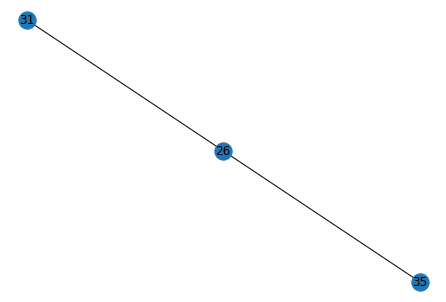

match_branches = [[26, 31]]
edges_to_delete (resolve crossover) = [[26, 35], [31, 35]]
edges_to_create (resolve crossover) = [[26, 31]]
edges_to_delete (cut_limb_network) = [array([26, 35]), array([31, 35])]
edges_to_create = [[26, 31]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 8, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27.0, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49}
Comp 1 = {35, 36, 6, 42, 43, 13}
Comp 2 = {10, 11, 14, 7}
Comp 3 = {12}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [11, 13], [13, 14], array([26, 35]), array([31, 35])]
curr_limb_copy.created_edges = [[11, 14], [6, 13], [26, 31]]
After get best cut: cut_edges = [array([26, 35]), array([31, 35])], added_edges = [[26, 31]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so m

  Edge: [18 11]: curr_angle = 56.37
  Edge: [11  9]: curr_angle = 99.22
  Edge: [9 8]: curr_angle = 83.2
  Edge: [ 8 29]: curr_angle = 32.89
  Edge: [29 21]: curr_angle = 106.48

Total time for doubling_back = 0.7959423065185547
There were 1 edges that passed doubling back threshold of 100
Winning edge [29 21] had a doubling back of 106.48028313305805
***inside resolve crossover!!!!****
coordinate_branches = [21, 27, 29]
21 = red
27 = aqua
29 = purple
Angle between 21 and 27 = 39.07 
Angle between 21 and 29 = 115.7 
Angle between 27 and 29 = 71.31 
Final Matches = []
matched_branches_revised = []
Original graph


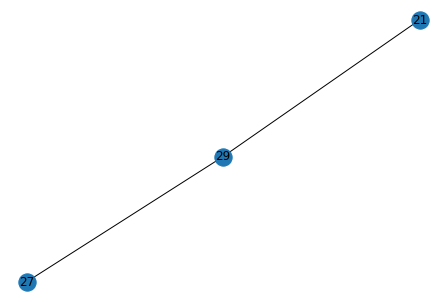

match_branches = []
edges_to_delete (resolve crossover) = [[21, 27], [21, 29], [27, 29]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([21, 27]), array([21, 29]), array([27, 29])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 29, 30}
Comp 1 = {21}
Comp 2 = {0, 7, 14, 15, 19, 20, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38}
curr_limb_copy.deleted_edges = [array([21, 27]), array([21, 29]), array([27, 29])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([21, 27]), array([21, 29]), array([27, 29])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 18 and 34
---- This disconnec

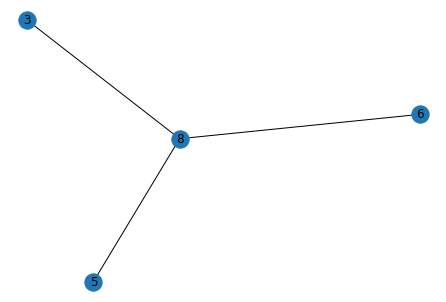

match_branches = [[6, 8]]
edges_to_delete (resolve crossover) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create (resolve crossover) = [[6, 8]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 6 because skeletal distance was 759.940462935039 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create = [[6, 8]]
Number of connected components = 4
Comp 0 = {1, 2, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 1 = {0, 3, 4}
Comp 2 = {13, 12, 5}
Comp 3 = {7}
curr_limb_copy.deleted_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
curr_limb_copy.created_edges = [[6, 8]]
After get best cut: cut_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]], added_edges = [[6, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No va

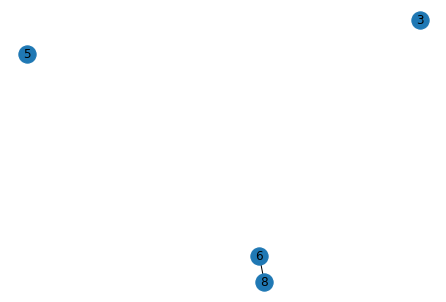

match_branches = [[6, 8]]
edges_to_delete (resolve crossover) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create (resolve crossover) = [[6, 8]]
curr_limb.deleted_edges 5 =[[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
Skipping endnode 6 because skeletal distance was 759.940462935039 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
edges_to_create = [[6, 8]]
Number of connected components = 4
Comp 0 = {1, 2, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 1 = {0, 3, 4}
Comp 2 = {13, 12, 5}
Comp 3 = {7}
curr_limb_copy.deleted_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
curr_limb_copy.created_edges = [[6, 8], [6, 8]]
After get best cut: cut_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8]], added_edges = [[6, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRE

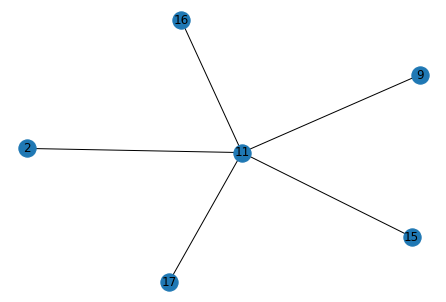

match_branches = [[11, 15], [9, 17]]
edges_to_delete (resolve crossover) = [[2, 9], [2, 11], [2, 15], [2, 16], [2, 17], [9, 11], [9, 15], [9, 16], [11, 16], [11, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[11, 15], [9, 17]]
curr_limb.deleted_edges 5 =[[3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [3, 5], [3, 6], [3, 8], [5, 6], [5, 8]]
Skipping endnode 6 because skeletal distance was 759.940462935039 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[2, 9], [2, 11], [2, 15], [2, 16], [2, 17], [9, 11], [9, 15], [9, 16], [11, 16], [11, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create = [[11, 15], [9, 17]]
Number of connected components = 7
Comp 0 = {1, 6, 8, 10, 11, 14, 15}
Comp 1 = {0, 3, 4}
Comp 2 = {13, 12, 5}
Comp 3 = {2}
Comp 4 = {9, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 5 = {16}
Comp 6 = {7}
curr_limb_copy.deleted_edges = [[3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [3, 5], [3, 6], [3, 8], [5, 6], [5, 8], [2, 9], [2, 11], [2

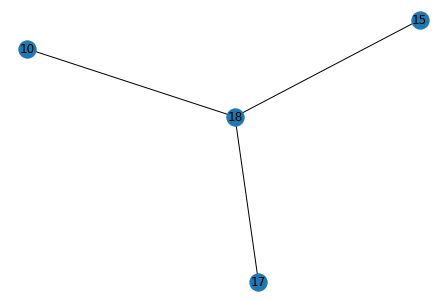

match_branches = []
edges_to_delete (resolve crossover) = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {10}
Comp 2 = {0, 6, 15}
Comp 3 = {17}
curr_limb_copy.deleted_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the en

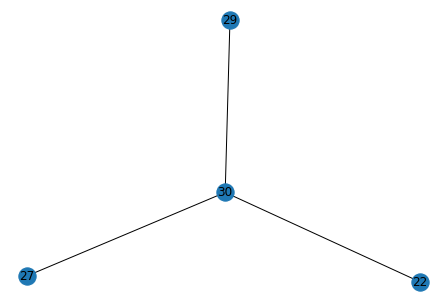

match_branches = [[27, 30]]
edges_to_delete (resolve crossover) = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
edges_to_create (resolve crossover) = [[27, 30]]
curr_limb.deleted_edges 5 =[[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
edges_to_create = [[27, 30]]
Number of connected components = 6
Comp 0 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 16, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {18, 12, 22}
Comp 2 = {20, 29, 23}
Comp 3 = {10}
Comp 4 = {0, 6, 15}
Comp 5 = {17}
curr_limb_copy.deleted_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18], [22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
curr_limb_copy.created_edges = [[27, 30]]
After get best cut: cut_edges = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]], 

  Edge: [26 24]: curr_angle = 43.76
  Edge: [24 25]: curr_angle = 64.03
  Edge: [25 31]: curr_angle = 23.72
  Edge: [31 33]: curr_angle = 160.11
  Edge: [33 30]: curr_angle = 42.34
  Edge: [30 27]: curr_angle = 25.63

Total time for doubling_back = 0.25301265716552734
There were 1 edges that passed doubling back threshold of 100
Winning edge [31 33] had a doubling back of 160.1097667646769
***inside resolve crossover!!!!****
coordinate_branches = [3, 31, 33]
3 = red
31 = aqua
33 = purple
Angle between 3 and 31 = 22.31 
Angle between 3 and 33 = 28.78 
Angle between 31 and 33 = 134.52 
Final Matches = [[3, 31], [3, 33]]
matched_branches_revised = [[3, 31]]
Original graph


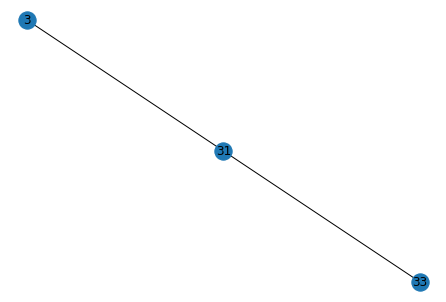

match_branches = [[3, 31]]
edges_to_delete (resolve crossover) = [[3, 33], [31, 33]]
edges_to_create (resolve crossover) = [[3, 31]]
edges_to_delete (cut_limb_network) = [array([ 3, 33]), array([31, 33])]
edges_to_create = [[3, 31]]
Number of connected components = 7
Comp 0 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 16, 19, 21, 24, 25, 26, 28, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {33, 34, 27, 30}
Comp 2 = {18, 12, 22}
Comp 3 = {20, 29, 23}
Comp 4 = {10}
Comp 5 = {0, 6, 15}
Comp 6 = {17}
curr_limb_copy.deleted_edges = [[10, 15], [10, 17], [10, 18], [15, 17], [15, 18], [17, 18], [22, 27], [22, 29], [22, 30], [27, 29], [29, 30], array([ 3, 33]), array([31, 33])]
curr_limb_copy.created_edges = [[27, 30], [3, 31]]
After get best cut: cut_edges = [array([ 3, 33]), array([31, 33])], added_edges = [[3, 31]]
total_soma_paths_to_cut = [[22, 27], [22, 29], [22, 30], [27, 29], [29, 30]]
-----------count

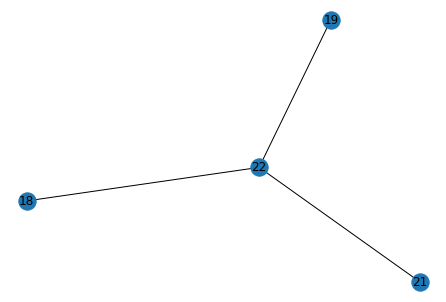

match_branches = [[19, 22]]
edges_to_delete (resolve crossover) = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
edges_to_create (resolve crossover) = [[19, 22]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 22 because skeletal distance was 1712.4626895413483 and threshold was 2500
skip_nodes = [22]
edges_to_delete (cut_limb_network) = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
edges_to_create = [[19, 22]]
Number of connected components = 4
Comp 0 = {6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19, 22, 23, 24, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
Comp 1 = {0, 1, 2, 3, 4, 5, 12, 16, 18}
Comp 2 = {25, 29, 21, 30}
Comp 3 = {20}
curr_limb_copy.deleted_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
curr_limb_copy.created_edges = [[19, 22]]
After get best cut: cut_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]], added_edges = [[19, 22]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cu

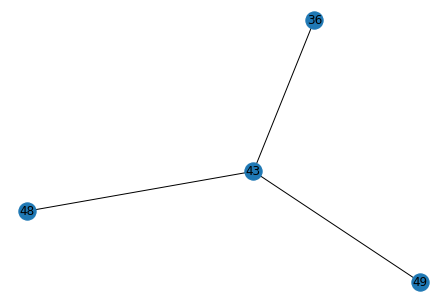

match_branches = [[43, 48]]
edges_to_delete (resolve crossover) = [[36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
edges_to_create (resolve crossover) = [[43, 48]]
curr_limb.deleted_edges 5 =[[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
Skipping endnode 22 because skeletal distance was 1712.4626895413483 and threshold was 2500
skip_nodes = [22]
edges_to_delete (cut_limb_network) = [[36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
edges_to_create = [[43, 48]]
Number of connected components = 6
Comp 0 = {6, 7, 8, 9, 10, 13, 14, 15, 17, 24, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 51, 52}
Comp 1 = {43, 44, 11, 48, 19, 22, 23, 27, 28}
Comp 2 = {49, 50, 47}
Comp 3 = {0, 1, 2, 3, 4, 5, 12, 16, 18}
Comp 4 = {25, 29, 21, 30}
Comp 5 = {20}
curr_limb_copy.deleted_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22], [36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
curr_limb_copy.created_edges = [[19, 22], [43, 48]]
After get best cut: cut_edges = [[36, 43], [36, 

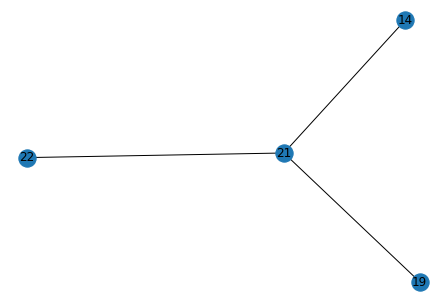

match_branches = [[19, 22], [14, 21]]
edges_to_delete (resolve crossover) = [[14, 19], [14, 22], [19, 21], [21, 22]]
edges_to_create (resolve crossover) = [[19, 22], [14, 21]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 34 because skeletal distance was 179.81124243568593 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[14, 19], [14, 22], [19, 21], [21, 22]]
edges_to_create = [[19, 22], [14, 21]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 22, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78}
Comp 1 = {9, 14, 21, 23, 25, 26}
Comp 2 = {20}
Comp 3 = {63}
curr_limb_copy.deleted_edges = [[14, 19], [14, 22], [19, 21], [21, 22]]
curr_limb_copy.created_edges = [[19, 22], [14, 21]]
After get best cut: cut_edges = [[14, 19], [14, 22], [19, 21],

In [ ]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")

In [ ]:
# import proofreading_utils as pru
# pru = reload(pru)
# du.create_suggested_splits_neuroglancer_spreadsheet(output_type="local")